In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Linearsepdata

In [2]:
linearsepdata=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Multiple CSV\Multiple CSV\4.linearsep.csv",header=None)

In [3]:
linearsepdata

0         1    2
0  -0.177497  0.930496  1.0
1   1.977424  1.766155  0.0
2   1.800024  1.700343  0.0
3  -0.770837  2.359163  1.0
4  -0.308009  1.594063  1.0
..       ...       ...  ...
95  2.632382  1.271305  0.0
96 -0.040256  1.782708  1.0
97 -0.787453  1.400357  1.0
98  2.702441  1.587444  0.0
99  1.290969  2.751937  1.0

[100 rows x 3 columns]

In [4]:
fv=linearsepdata.iloc[:,:2]
cv=linearsepdata.iloc[:,-1]

In [5]:
fv

0         1
0  -0.177497  0.930496
1   1.977424  1.766155
2   1.800024  1.700343
3  -0.770837  2.359163
4  -0.308009  1.594063
..       ...       ...
95  2.632382  1.271305
96 -0.040256  1.782708
97 -0.787453  1.400357
98  2.702441  1.587444
99  1.290969  2.751937

[100 rows x 2 columns]

In [6]:
cv

0     1.0
1     0.0
2     0.0
3     1.0
4     1.0
     ... 
95    0.0
96    1.0
97    1.0
98    0.0
99    1.0
Name: 2, Length: 100, dtype: float64

In [9]:
std=StandardScaler()
p_fv=std.fit_transform(fv)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

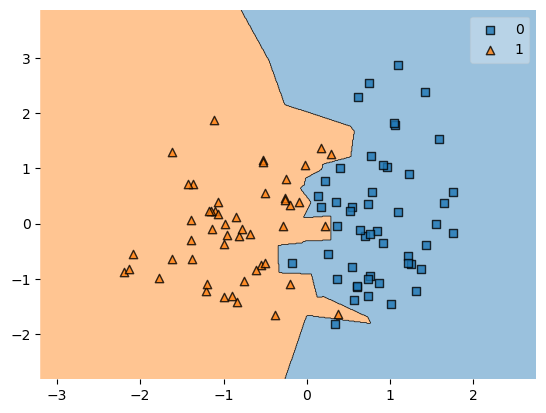

In [10]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(p_fv,cv.astype(int))
plot_decision_regions(X=p_fv,y=cv.astype(int).values,clf=knn)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

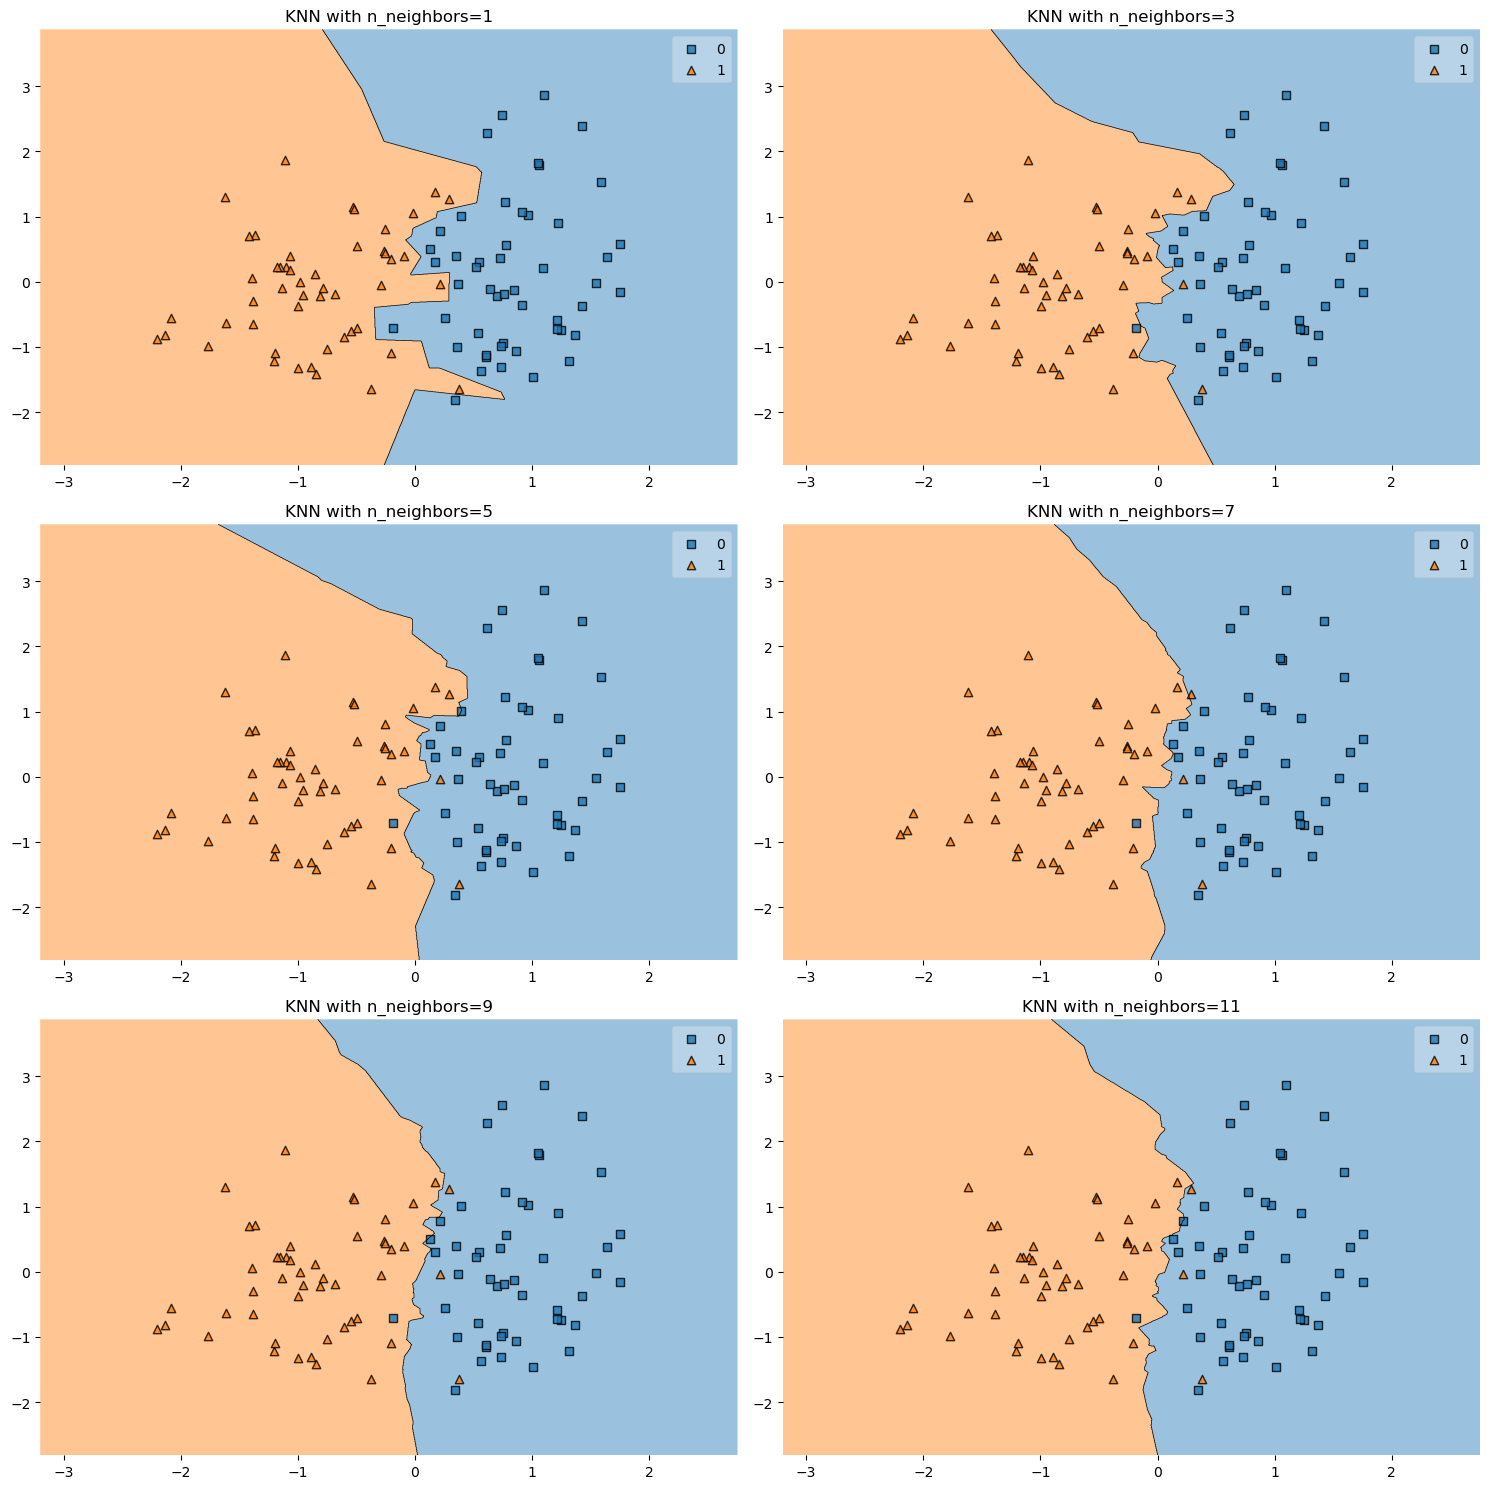

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(1, 12, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(p_fv, cv.astype(int))
    plot_decision_regions(X=p_fv, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

## Using accuracy method

In [18]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1,stratify=cv)

In [19]:
std=StandardScaler()
px_train=std.fit_transform(x_train)
px_test=std.transform(x_test)

In [20]:
k=[]
acc=[]
err=[]

for i in range(1,80,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(px_train,y_train)
    predicted=model.predict(px_test)
    k.append(i)
    acc.append(accuracy_score(y_test,predicted))
    err.append(1-accuracy_score(y_test,predicted))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

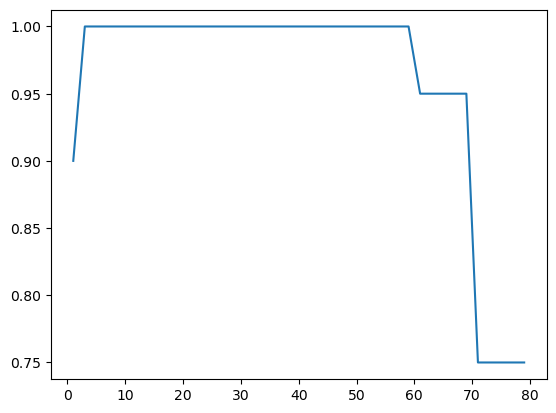

In [21]:
plt.plot(k,acc)